<a href="https://colab.research.google.com/github/chrislee973/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-09-02 19:52:20--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.78.254
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.78.254|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  89.5MB/s    in 2.2s    

2020-09-02 19:52:23 (89.5 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [ ]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [5]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
#Read in all the datasets 

aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
order_products_train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

In [9]:
order_products_prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [10]:
#Concat order_products_prior and order_products_train 

order_products = pd.concat([order_products_prior, order_products_train])
order_products

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [53]:
#Get the top 10 most ordered products from order_products
num_orders = order_products['product_id'].value_counts()
top10_prods =num_orders.head(10)
top10_prods

24852    491291
13176    394930
21137    275577
21903    251705
47209    220877
47766    184224
47626    160792
16797    149445
26209    146660
27845    142813
Name: product_id, dtype: int64

In [39]:
#Convert top10_prods into a df in order to merge with products df

top10_prods_df = pd.DataFrame(top10_prods).reset_index()
top10_prods_df.columns = ['product_id', '# orders']
top10_prods_df

,product_id,# orders
0,24852,491291
1,13176,394930
2,21137,275577
3,21903,251705
4,47209,220877
5,47766,184224
6,47626,160792
7,16797,149445
8,26209,146660
9,27845,142813


In [40]:
#Merge with products df 

top10_prods_merged = pd.merge(top10_prods_df, products, on='product_id')
top10_prods_merged

,product_id,# orders,product_name,aisle_id,department_id
0,24852,491291,Banana,24,4
1,13176,394930,Bag of Organic Bananas,24,4
2,21137,275577,Organic Strawberries,24,4
3,21903,251705,Organic Baby Spinach,123,4
4,47209,220877,Organic Hass Avocado,24,4
5,47766,184224,Organic Avocado,24,4
6,47626,160792,Large Lemon,24,4
7,16797,149445,Strawberries,24,4
8,26209,146660,Limes,24,4
9,27845,142813,Organic Whole Milk,84,16


Text(0.5, 1.0, 'Top 10 Most Ordered Products')

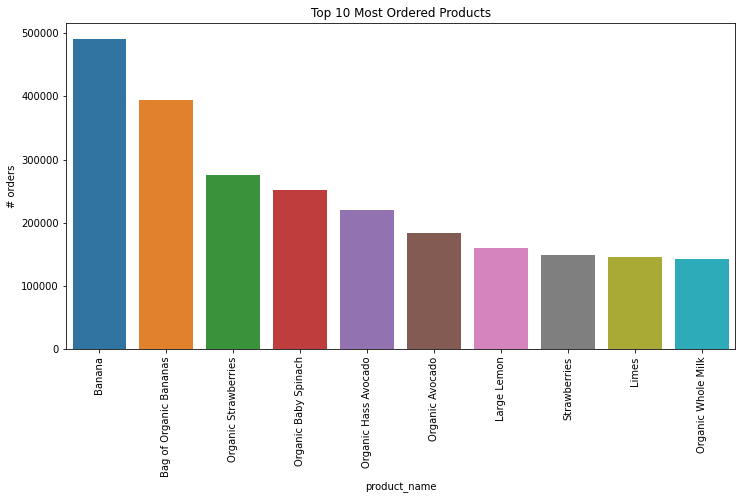

In [41]:
#Bar chart of the # of orders of top 10 products 

plt.figure(figsize=(12,6))
sns.barplot(data=top10_prods_merged, x='product_name', y='# orders')
plt.xticks(rotation='vertical')
plt.title('Top 10 Most Ordered Products')

In [76]:
#Which products have the highest reorder percentage?


#First, I need to get the total number of reorders for each product 
total_reorders = order_products.groupby('product_id')['reordered'].sum().sort_values(ascending=False)
total_reorders



product_id
24852    415166
13176    329275
21137    214448
21903    194939
47209    176173
          ...  
31901         0
31902         0
14308         0
4690          0
11026         0
Name: reordered, Length: 49685, dtype: int64

In [114]:
#Convert above series into df in order to merge with products
total_reorders_df = pd.DataFrame(total_reorders).reset_index()
total_reorders_df


,product_id,reordered
0,24852,415166
1,13176,329275
2,21137,214448
3,21903,194939
4,47209,176173
...,...,...
49680,31901,0
49681,31902,0
49682,14308,0
49683,4690,0


In [120]:
#Add # of orders column which displays the total number of orders for that particular product

total_reorders_df['# orders'] = total_reorders_df['product_id'].apply(lambda x: num_orders[x])

total_reorders_df

,product_id,reordered,# orders
0,24852,415166,491291
1,13176,329275,394930
2,21137,214448,275577
3,21903,194939,251705
4,47209,176173,220877
...,...,...,...
49680,31901,0,3
49681,31902,0,5
49682,14308,0,5
49683,4690,0,5


In [121]:
#Add % reorder column which is just the division of columns: reordered/ (# of orders)

total_reorders_df['% reorder'] = total_reorders_df['reordered']/ total_reorders_df['# orders']

total_reorders_df

,product_id,reordered,# orders,% reorder
0,24852,415166,491291,0.845051
1,13176,329275,394930,0.833755
2,21137,214448,275577,0.778178
3,21903,194939,251705,0.774474
4,47209,176173,220877,0.797607
...,...,...,...,...
49680,31901,0,3,0.000000
49681,31902,0,5,0.000000
49682,14308,0,5,0.000000
49683,4690,0,5,0.000000


In [124]:
total_reorders_df = total_reorders_df.sort_values(by= '% reorder', ascending=False)

top10_reorder = total_reorders_df.head(10)

top10_reorder

,product_id,reordered,# orders,% reorder
16620,6433,65,69,0.942029
14805,2075,84,90,0.933333
29883,43553,12,13,0.923077
14077,27740,94,102,0.921569
22166,14609,32,35,0.914286
20239,13875,41,45,0.911111
26023,39992,20,22,0.909091
23542,5868,27,30,0.900000
16920,36543,62,69,0.898551
17172,26093,60,67,0.895522


In [126]:
pd.merge(products, top10_reorder).sort_values(by='% reorder', ascending=False)

,product_id,product_name,aisle_id,department_id,reordered,# orders,% reorder
2,6433,Raw Veggie Wrappers,13,20,65,69,0.942029
0,2075,Serenity Ultimate Extrema Overnight Pads,126,11,84,90,0.933333
9,43553,Orange Energy Shots,64,7,12,13,0.923077
6,27740,Chocolate Love Bar,45,19,94,102,0.921569
4,14609,Soy Powder Infant Formula,92,18,32,35,0.914286
3,13875,Simply Sleep Nighttime Sleep Aid,6,2,41,45,0.911111
8,39992,"Energy Shot, Grape Flavor",64,7,20,22,0.909091
1,5868,Russian River Valley Reserve Pinot Noir,28,5,27,30,0.900000
7,36543,Bars Peanut Butter,88,13,62,69,0.898551
5,26093,Soy Crisps Lightly Salted,107,19,60,67,0.895522


## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [100]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [101]:
#Convert table 2 to tidy
table2 = table2.reset_index()
tidy_table2 = table2.melt(id_vars='index', value_vars=['John Smith', 'Jane Doe', 'Mary Johnson'], var_name = 'Name', value_name = 'Result')

tidy_table2 = tidy_table2[['Name', 'index', 'Result']]
tidy_table2.columns= ['Name', 'Treatment', 'Result']

tidy_table2

,Name,Treatment,Result
0,John Smith,treatmenta,NaN
1,John Smith,treatmentb,2.0
2,Jane Doe,treatmenta,16.0
3,Jane Doe,treatmentb,11.0
4,Mary Johnson,treatmenta,3.0
5,Mary Johnson,treatmentb,1.0


In [104]:
# tidy -> table2

t2 = tidy_table2.pivot_table(index='Name', columns='Treatment', values='Result')

t2

Treatment,treatmenta,treatmentb
Name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


In [105]:
flights = sns.load_dataset('flights')

In [106]:
# Flights Pivot Table
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [112]:
#Create pivot table of flights

flights_pivot = flights.pivot(index='month', columns='year', values='passengers')

flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [ ]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [ ]:
##### YOUR CODE HERE #####